In [1]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

In [2]:
qa_df = pd.read_csv('data/answers_and_questions.csv')

In [19]:
len(qa_df)

1055166

In [4]:
qa_df.head()

,question_id,question_date,question_score,question_title,question_text,question_cleaned_text,answer_id,answer_date,answer_score,answer_text,answer_cleaned_text
0,469,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,i am using the photoshop's javascript api to f...,497.0,2008-08-02T16:56:53Z,4.0,<p>open up a terminal (Applications-&gt;Utilit...,open up a terminal (applications-&gt;utilities...
1,469,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,i am using the photoshop's javascript api to f...,518.0,2008-08-02T17:42:28Z,2.0,<p>I haven't been able to find anything that d...,i have not been able to find anything that doe...
2,469,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,i am using the photoshop's javascript api to f...,3040.0,2008-08-06T03:01:23Z,12.0,<p>Unfortunately the only API that isn't depre...,unfortunately the only api that is not depreca...
3,469,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,i am using the photoshop's javascript api to f...,195170.0,2008-10-12T07:02:40Z,1.0,<p>There must be a method in Cocoa to get a li...,there must be a method in cocoa to get a list ...
4,502,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,i have a cross-platform (python) application w...,536.0,2008-08-02T18:49:07Z,9.0,<p>You can use ImageMagick's convert utility f...,you can use imagemagick's convert utility for ...


In [5]:
qa_df['answer_score'].describe()

count    987122.000000
mean          3.028437
std          21.263246
min         -38.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        8384.000000
Name: answer_score, dtype: float64

<AxesSubplot:>

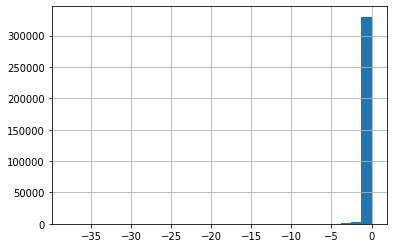

In [15]:
qa_df['answer_score'][qa_df['answer_score'] < 1].hist(bins=30)

In [18]:
qa_df['question_id'].nunique()

607282

## Create train test split

In [5]:
qa_df = qa_df.dropna()

In [6]:
gss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

In [7]:
splits = gss.split(qa_df, groups=qa_df['question_id'])
for split in splits:
    train_ids, test_ids = split

In [8]:
train_df = qa_df.iloc[train_ids]
test_df = qa_df.iloc[test_ids]

In [11]:
train_df.to_csv('data/train.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

## Create sample dataset

In [12]:
sample_gss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

In [13]:
splits = sample_gss.split(qa_df, groups=qa_df['question_id'])
for split in splits:
    _, sample_dataset_ids = split

In [14]:
sample_df = qa_df.iloc[sample_dataset_ids]
sample_df = sample_df.dropna()

In [15]:
train_test_gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [16]:
splits = train_test_gss.split(sample_df, groups=sample_df['question_id'])
for split in splits:
    sample_train_ids, sample_test_ids = split

In [17]:
sample_train_df = sample_df.iloc[sample_train_ids]
sample_test_df = sample_df.iloc[sample_test_ids]

In [18]:
sample_train_df.to_csv('data/sample_train.csv', index=False)
sample_test_df.to_csv('data/sample_test.csv', index=False)